# Plots the State Transition Graph

Plots STG for a couple of boolean networks. Note that for large networks the STG can be very large.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cana
from cana.datasets.bio import MARQUESPITA
import networkx as nx
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', **{'size':16})

In [3]:
N = MARQUESPITA()

In [4]:
STG = N.state_transition_graph()
#print STG.nodes(data=True)
attractors = N.attractors(mode='stg')
print('STG: %s' % (attractors))
attractors_ = N.attractors(mode='bns')
print('BNS: %s' % (attractors_))

STG: [[126]]
BNS: [[126]]


Nodes: 128 | Edges: 128


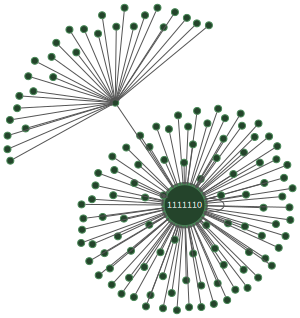

In [5]:
# Draw the State Transition Graph
G = graphviz.Digraph(name='State Transition Graph', engine='neato')
G.attr('graph', concentrate='true', simplify='true', overlap='true')
G.attr('node', shape='circle', fixedsize='true', width='.4', color='#488957', style='filled', fillcolor='#24442b', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='9')
G.attr('edge', arrowhead='normal', arrowsize='.1', color='#545454')

for node,d in STG.nodes(data=True):
    if any(node in attractor for attractor in attractors): #node in attractors:
        label = d['label']
        width = '0.6'
        penwidth = '3'
    else:
        label = ''
        width = '0.1'
        penwidth = '1'
    G.node(name=str(node), label=label, width=width, penwidth=penwidth)
for s,t,d in STG.edges(data=True):
    G.edge(str(s),str(t))
print('Nodes: %d | Edges: %d' % (len(STG.nodes()) , len(STG.edges()) ))
G